<h3> Explanation </h3>

*By saying "distict item", I mean that I do not take into account the number of such goods in one order
<h4> Prices and Counters </h4>
<ul>
    <li><i>successful_orders_count</i> - number of total delivered orderes that were performed by the client </li>
    <li><i>avg_unique_items_per_order</i> - number of distict items that are purchased on average in one order </li>
    <li><i>all_unique_items_purchased</i> - total number of distict items that has ever been purchased across all orders made </li>
    <li><i>avg_items_per_order</i> - number of items purchased on average in one order </li>
    <li><i>all_items_purchased</i> - total number of items ever purchased by the client across all orders made </li>
    <li><i>avg_item_price</i> - average price of one good in one order </li>
    <li><i>avg_unique_items_price</i> - average price of one distict good in one order </li>
    <li><i>all_items_price</i> - total price of all items ever purchased by the client </li>
    <li><i>avg_summed_cost_of_items_per_order</i> - average price of all items summed in one order </li>
    <li><i>total_shipping_charges</i> - total cost of all shipping costs ever charged </li>
    <li><i>avg_shipping_charges</i> - average cost of shipping charges per order </li>
    <li><i>total_service_charges</i> - total cost of all service costs ever charged </li>
    <li><i>avg_service_charges</i> - total cost of service charges per order </li>
    <li><i>total_payment</i> - total value paid by the client </li>
    <li><i>avg_payment</i> - average value paid by the client per order </li>
    <li><i>total_profit</i> - total profit for one client </li>
    <li><i>avg_order_profit</i> - average profit per order </li>
    <li><i>avg_item_profit</i> - average profit per item </li><br>
</ul>
<h4>Share of items in a certain category</h4>
<ul>
    <li><i>related products</i></li>
    <li><i>baby food</i></li>
    <li><i>office goods</i></li>
    <li><i>books, disks</i></li>
    <li><i>breastfeeding products</i></li>
    <li><i>textile, knitwear</i></li>
    <li><i>footwear</i></li>
    <li><i>oversized goods</i></li>
    <li><i>toys</i></li>
    <li><i>women things</i></li>
    <li><i>goods for pets</i></li>
    <li><i>cosmetics and hygiene</i></li>
    <li><i>diapers</i></li>
</ul>
<h4>Share of different shipping methods used</h4>
<ul>
    <li><i>pickup</i></li>
    <li><i>express delivery</i></li>
    <li><i>transport company</i></li>
    <li><i>DPD</i></li>
    <li><i>pick point</i></li>
    <li><i>store</i></li>
</ul>
<h4>Share of item size category</h4>
<ul>
    <li><i>Oversized</i></li>
    <li><i>Compact</i></li>
</ul>
<h4>Share of payment method used</h4>
<ul>
    <li><i>cash payment</i></li>
    <li><i>cashless payment</i></li>
</ul>
<h4>Canceled and delivered orders</h4>
<ul>
    <li><i>number_canceled</i> - total number of canceled orders per client</li>
    <li><i>avg_number_canceled</i> - average number of canceled orders per client</li>
    <li><i>total_delivered</i> - total number of delivered orders per client </li>
    <li><i>avg_delivered</i> - average number of delivered orders per client </li>
</ul>

<ul>
    <li><i>successful_orders_count</i> - Общее количество заказов </li>
    <li><i>avg_unique_items_per_order</i> - Среднее количество уникальных товаров в заказе </li>
    <li><i>all_unique_items_purchased</i> - Общее количество уникальный товаров в среднем в заказе </li>
    <li><i>avg_items_per_order</i> - Среднее количество товаров в заказе </li>
    <li><i>all_items_purchased</i> - Среднее количество товаров во всех заказах </li>
    <li><i>avg_item_price</i> - Средняя цена товара </li>
    <li><i>avg_unique_items_price</i> - Средняя цена товара, учитывая уникальность (количество товаров 1 типа не учитывается) </li>
    <li><i>all_items_price</i> - Суммарная стоимость товаров когда либо купленных клиентом </li>
    <li><i>avg_summed_cost_of_items_per_order</i> - Средняя сумма товаров в заказе </li>
    <li><i>total_shipping_charges</i> - Средняя сумма всех услуг доставки </li>
    <li><i>avg_shipping_charges</i> - Средняя цена доставки </li>
    <li><i>total_service_charges</i> - Средняя сумма всех сервисных услуг </li>
    <li><i>avg_service_charges</i> - Средняя стоимость сервисных услуг на заказ </li>
    <li><i>total_payment</i> - Средняя сумма всех чеков </li>
    <li><i>avg_payment</i> - Средний чек </li>
    <li><i>total_profit</i> - Средняя маржа с клиента </li>
    <li><i>avg_order_profit</i> - Средняя маржа с заказа </li>
    <li><i>avg_item_profit</i> - Средняя маржа с товара </li><br>
</ul>

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import copy

<h3> Read data </h3>

In [216]:
file = pd.read_csv('data_mart.csv', sep=",", encoding='cp1251', index_col=0)

In [217]:
data = copy.deepcopy(file)
data = data.drop(['pickup', 'express delivery', 'transport company', 'DPD', 'pick point', 'store'], axis=1)
data = data.drop(['cash payment', 'cashless payment', 'avg_delivered'], axis=1)

In [218]:
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(data)

<h4> Clusterization </h4>

In [219]:
K = 3

In [220]:
kmeans = KMeans(n_clusters=K, random_state=0).fit(X)

In [221]:
kmeans.labels_

array([0, 1, 1, ..., 1, 1, 0])

<h4> DBSCAN (alternative) </h4>

In [189]:
X_sample = pd.DataFrame(X).sample(frac=0.05).values
eps, cluster_counts = [], []
for i in range(10):
    eps_p = 0.35 + 0.01*i
    dbscan = DBSCAN(eps=eps_p, n_jobs=4).fit(X_sample)
    n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
    eps.append(eps_p); cluster_counts.append(n_clusters_)
    print((i+1)/10)

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0


Text(0.5, 1.0, 'DBSCAN')

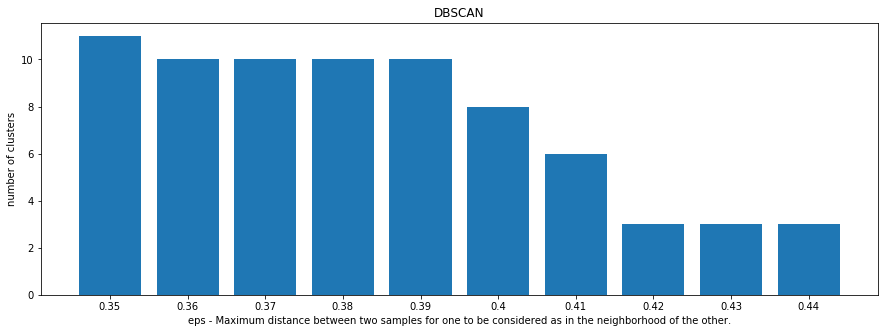

In [190]:
plt.figure(figsize=(15,5))
plt.bar(np.round(np.array(eps), 2).astype(str), cluster_counts)
plt.xlabel('eps - Maximum distance between two samples for one to be considered as in the neighborhood of the other.')
plt.ylabel('number of clusters')
plt.title('DBSCAN')

In [245]:
dbscan = DBSCAN(eps=0.41, n_jobs=4).fit(X)

In [246]:
uniqueDBS, countsDBS = np.unique(dbscan.labels_, return_counts=True)

In [247]:
list(countsDBS[1:]/(sum(countsDBS[1:])))

[0.999766191255553, 0.00013360499682688132, 0.000100203747620161]

In [241]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<h4> Elbow method </h4>

In [24]:
from scipy.spatial.distance import cdist

In [25]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

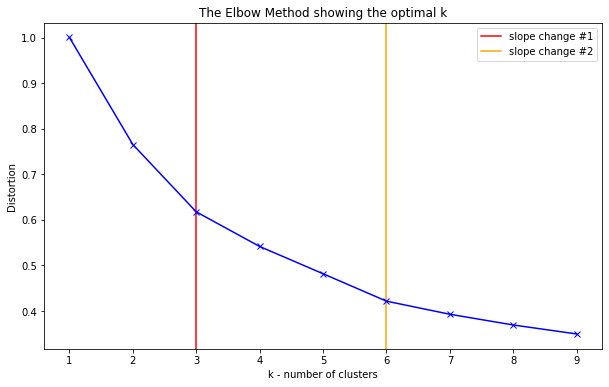

In [211]:
# Plot the elbow
plt.figure(figsize=(10,6))
plt.axvline(3, 0, 1, label='slope change #1', color='red')
plt.axvline(6, 0, 1, label='slope change #2', color='orange')
plt.plot(K, distortions, 'bx-')
plt.xlabel('k - number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.legend(); plt.show()

<h3> Dimensionality reduction and visualizing result </h3>

In [222]:
pca = PCA(n_components=2); pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [223]:
Y = pca.transform(X)
print(Y.shape)

(60059, 2)


In [224]:
colors = np.random.randint(0,255, size=(K,3))/255
c_arr = np.array(list(map(lambda x: colors[x], list(kmeans.labels_))))

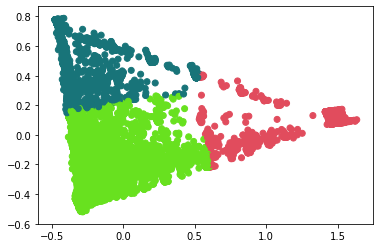

In [225]:
plt.scatter(Y[:, 0], Y[:, 1], c =c_arr)

<h3> Cluster centers </h3>

In [226]:
clusters_df = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns = data.columns)

In [227]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
n_profiles = np.asarray((unique, counts)).T[:, 1]
n_profiles = n_profiles / np.sum(n_profiles)
clusters_df['n_profiles'] = n_profiles

In [228]:
clusters_df

,successful_orders_count,avg_unique_items_per_order,all_unique_items_purchased,avg_items_per_order,all_items_purchased,avg_item_price,avg_unique_items_price,all_items_price,avg_summed_cost_of_items_per_order,total_shipping_charges,...,women things,goods for pets,cosmetics and hygiene,diapers,Oversized,Compact,number_canceled,avg_number_canceled,total_delivered,n_profiles
0,1.082241,1.207118,1.316546,1.239173,1.354293,7085.381763,7126.871803,8580.927049,7921.274457,45.683356,...,-7.849624e-17,0.000489,0.002825,0.002551,0.973841,0.026159,0.018678,0.006004,1.082241,0.170266
1,1.416111,3.527338,5.153833,5.452685,8.033451,935.697341,1223.226791,2800.155259,1952.223566,64.798946,...,1.174920e-03,0.022055,0.094087,0.259416,0.017843,0.982157,0.082797,0.009574,1.416111,0.571921
2,1.162297,2.399730,2.900607,2.575791,3.143890,1284.343459,1313.564706,2249.578662,1943.915984,67.413588,...,3.523756e-05,0.001072,0.006775,0.007777,0.018408,0.981592,0.053152,0.008523,1.162297,0.257813


In [229]:
#///////////////////////////////////////////////////////////////////////////////////////////

In [230]:
data_tr = np.roll(clusters_df.values, -1, axis=0).transpose()

In [231]:
data_std = data_tr.std(axis=1)
data_mean = data_tr.mean(axis=1)

In [232]:
df_tr = pd.DataFrame(data_tr, index=clusters_df.columns, columns=["Group 1", "Group 2", "Group 3"])
df_tr['STD'] = data_std
df_tr['Mean'] = data_mean

In [233]:
df_tr.head()

,Group 1,Group 2,Group 3,STD,Mean
successful_orders_count,1.416111,1.162297,1.082241,0.142322,1.220216
avg_unique_items_per_order,3.527338,2.399730,1.207118,0.947350,2.378062
all_unique_items_purchased,5.153833,2.900607,1.316546,1.574486,3.123662
avg_items_per_order,5.452685,2.575791,1.239173,1.758053,3.089216
all_items_purchased,8.033451,3.143890,1.354293,2.822954,4.177211


<h4> This is some junk for saving purpuses </h4>

In [234]:
df_tr.to_excel('market_clusters_vertical.xlsx', sheet_name='market_clusters')

In [269]:
clusters_df.to_csv('market_clusters.csv', sep=',', encoding='cp1251')

In [270]:
clusters_df.to_excel('market_clusters_excel.xlsx', sheet_name='market_clusters')

In [267]:
data['cluster'] = kmeans.labels_
data.to_csv('data_mart_clustered.csv', sep=',', encoding='cp1251')